### Project: Student Performance Prediction
To predict the score or mark of student in exam with information like study Hour, Sleep Hour, and other factors.

Importing pandas to load the data and handle it

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Posting\Student Grade Project\data.csv")
df.head() #viewing first five rows

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [2]:
df.info() #getting information of the features and data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


In [3]:
df.describe() #getting the statistical report of the data

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.552274,4.560807,8.047262,58.536023,40.691643
std,0.261272,1.897581,1.370700,11.675287,9.467358
min,0.101280,0.800000,4.800000,40.000000,32.000000
25%,0.322118,3.475000,7.000000,49.000000,34.000000
50%,0.545945,3.900000,8.400000,57.000000,35.000000
75%,0.789610,5.900000,9.100000,66.000000,47.000000
max,0.999820,10.000000,10.000000,100.000000,91.000000


In [4]:
df.isnull().sum() #checking for missing data

Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64

Importing seaborn to analyse and visualize the data

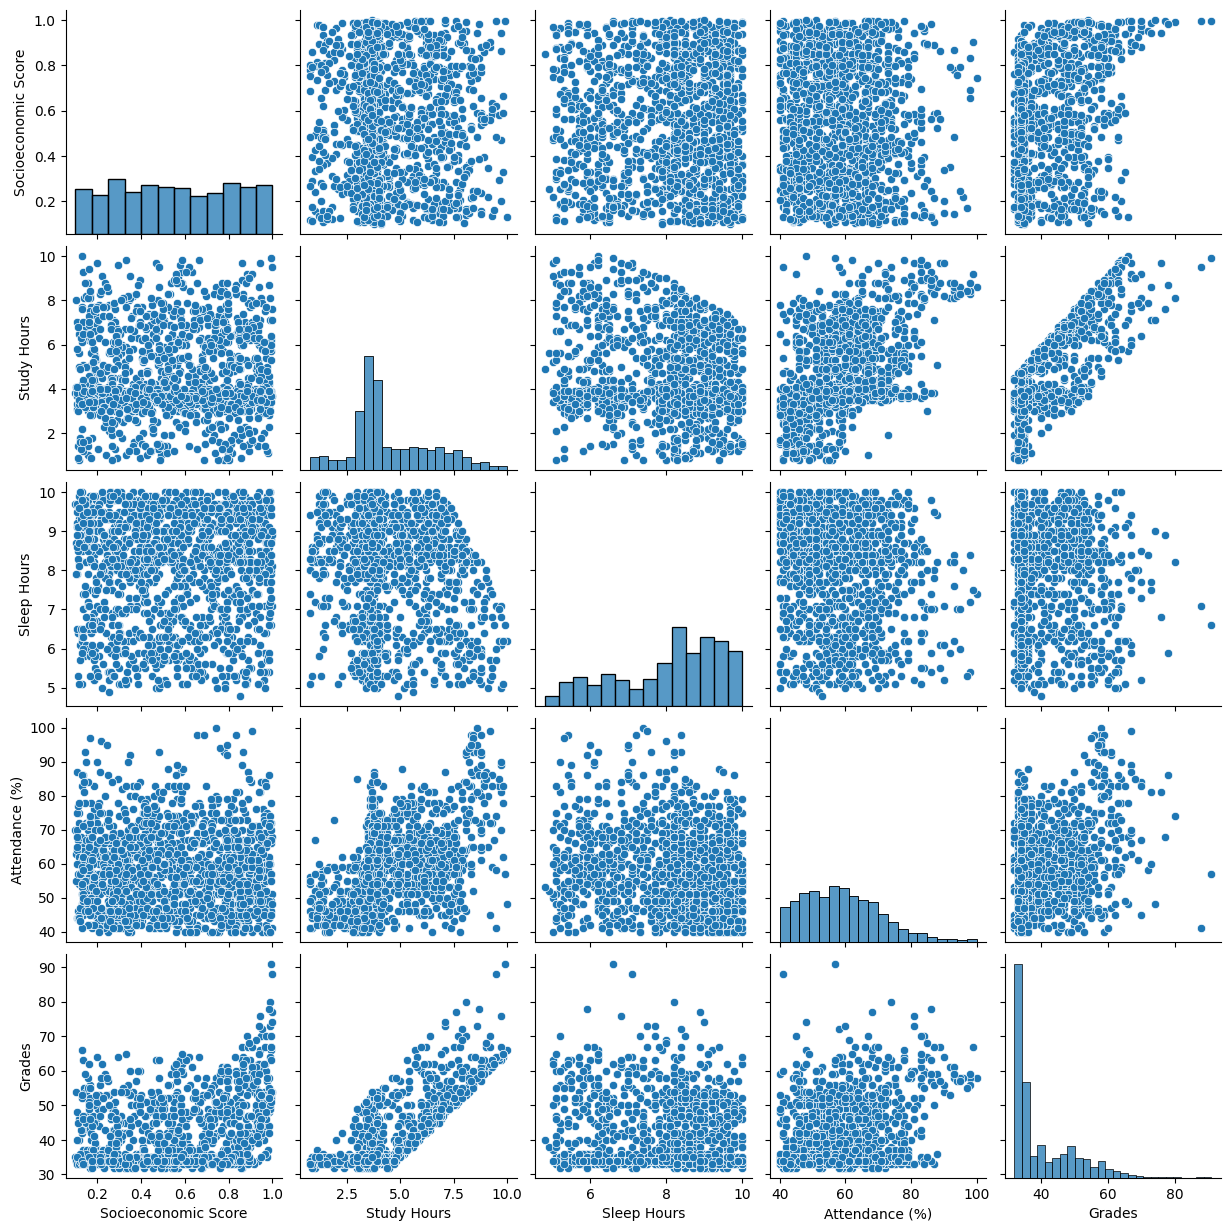

In [5]:
import seaborn as sns
sns.pairplot(df)  #to see the relationship between each variable


- We can see that the points are scatter through out the plot meaning there is no correlation between each.
- That is except for the Study Hours and Grade
- We can see that they have a linear relation.
- To conform this we can also plot a correlation map or heat map

<Axes: >

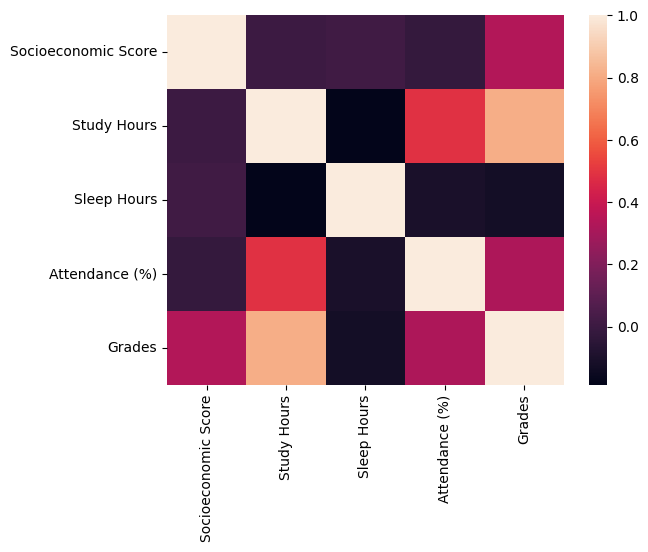

In [6]:
sns.heatmap(df.corr()) #visualising the correlation

- As observed before we see that only Study Hours has a correlation with our target grade
- Thus we are to use simple linear regression to predict                                                                                     

We now split the feature and target

In [7]:
x = df.iloc[:, :-1] #Gathering our features
x

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%)
0,0.95822,3.4,8.2,53.0
1,0.85566,3.2,5.9,55.0
2,0.68025,3.2,9.3,41.0
3,0.25936,3.2,8.2,47.0
4,0.60447,3.8,10.0,75.0
...,...,...,...,...
1383,0.44549,5.5,8.0,51.0
1384,0.52466,4.9,6.5,63.0
1385,0.88197,3.9,6.2,54.0
1386,0.47336,3.5,7.3,61.0


In [8]:
y = df["Grades"] #Grade is our target that we are to predict
y

0       47.0
1       35.0
2       32.0
3       34.0
4       33.0
        ... 
1383    41.0
1384    37.0
1385    36.0
1386    34.0
1387    35.0
Name: Grades, Length: 1388, dtype: float64

We now split the train and test data

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

We now are going to standardize the the input data

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

Let us import and train the model and predict the value

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(x_train, y_train)

In [12]:
y_pred = model.predict(x_test)

Lets check the accuracy and the error of our model

In [13]:
from sklearn.metrics import mean_absolute_error, r2_score
mean_absolute_error(y_test, y_pred)

3.5175979504151473

In [14]:
r2_score(y_test, y_pred)

0.7651729500817179

As the score of linear model is less we are to try another model. Let it be SVM regression

In [21]:
from sklearn.svm import SVR
svm = SVR(kernel = "linear", C=0.2)
svr = svm.fit(x_train, y_train)
r2_score(y_test, svr.predict(x_test))

0.7398112795053344

As the model score is getting worst we'll see about the Decision Tree

In [22]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtm = dtr.fit(x_train, y_train)
r2_score(y_test, dtm.predict(x_test))

0.9510884349363893

As the model score has increased in great let us give random forest model a try to enhance it

In [24]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfm = rfr.fit(x_train, y_train)
r2_score(y_test, rfm.predict(x_test))

0.982425147670414

Thus we conclude that Random Forest Model is the best for this data set

Finally lets write these models to a pickle file

In [25]:
import pickle
with open("Student Grade Prediction.pkl", "wb") as file:
    pickle.dump((ss,lr, svm, dtr, rfr), file)